# **CLAHE and Thresholding Using Python (cv2)**
---

## **Overview**
This report details the process of applying histogram equalization, Contrast Limited Adaptive Histogram Equalization (CLAHE), and various thresholding techniques to enhance and segment a grayscale image using OpenCV. These methods are valuable for improving contrast, highlighting image features, and preparing images for further analysis or classification.

## **1. Importing Required Libraries**
- OpenCV (`cv2`): A widely-used library for computer vision, used here for denoising, blurring, and edge detection techniques.
- NumPy (`np`): Provides array support, used for kernel manipulation and custom filter creation.
- Matplotlib (`plt`): Used for displaying images in a notebook or interactive Python environment.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **2. Image Loading and Displaying**
- The image is loaded in grayscale using OpenCV's `cv2.imread()` function, with `0` indicating grayscale mode. Loading images in grayscale is helpful in tasks that focus on intensity values rather than color, reducing computational complexity by analyzing a single channel.

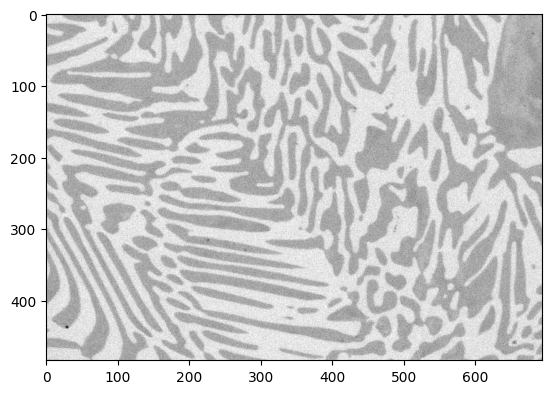

In [6]:
img = cv2.imread("/content/Alloy.jpg", 0)
plt.imshow(img, cmap="gray");

## **3. Histogram Equalization**
- Histogram equalization enhances the contrast of the grayscale image by spreading out the intensity values across the full range of the histogram (0 to 255). This technique is particularly useful for images with poor contrast, where a narrow range of intensity values is concentrated around specific regions.

**Parameters**:
- `cv2.equalizeHist(src)`: Applies histogram equalization to the grayscale image.

**Variations**:
- Global vs. Local Equalization: Global histogram equalization modifies the entire image uniformly, while adaptive equalization (like CLAHE) adjusts regions individually, preserving more localized details.

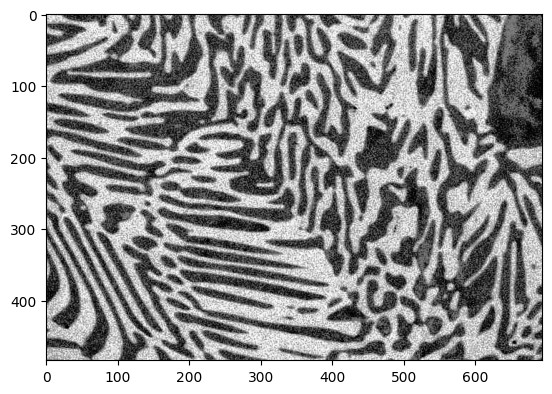

In [7]:
equalized_img = cv2.equalizeHist(img)
plt.imshow(equalized_img, cmap="gray");

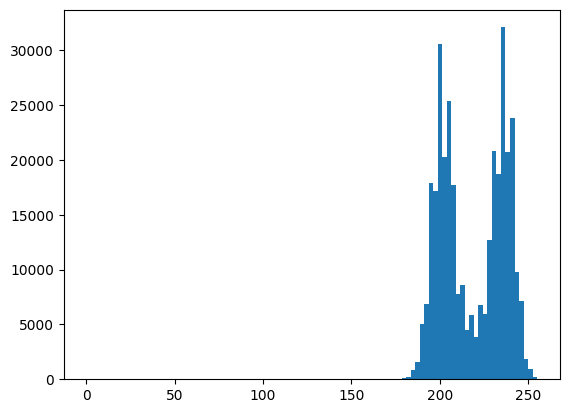

In [8]:
plt.hist(img.flat, bins=100, range=(0, 255));

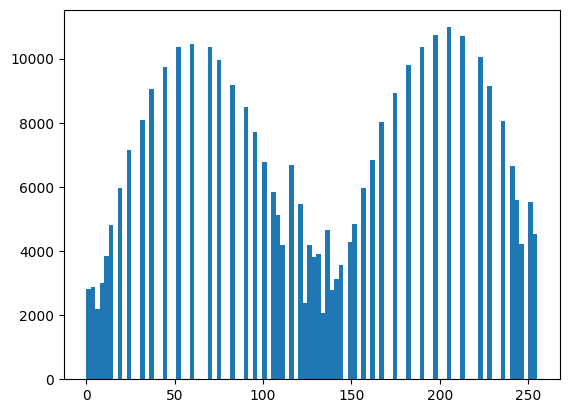

In [9]:
plt.hist(equalized_img.flat, bins=100, range=(0, 255));

## **4. Adaptive Histogram Equalization Using CLAHE**
- CLAHE (Contrast Limited Adaptive Histogram Equalization) enhances local contrast, making details more visible in different regions of the image without amplifying noise excessively. CLAHE divides the image into small tiles, applies equalization to each, and merges them to avoid over-amplifying contrast in homogeneous regions.

**Parameters**:
- `clipLimit=2.0`: Limits the contrast enhancement to prevent over-amplification, especially in areas with minimal variation. Higher values yield stronger contrast but may increase noise.
- `tileGridSize=(8, 8)`: Divides the image into an 8x8 grid of tiles, applying equalization within each tile individually. A smaller grid focuses on finer details, while a larger grid balances the image globally.
- `clahe.apply(src)`: Applies CLAHE to the image.

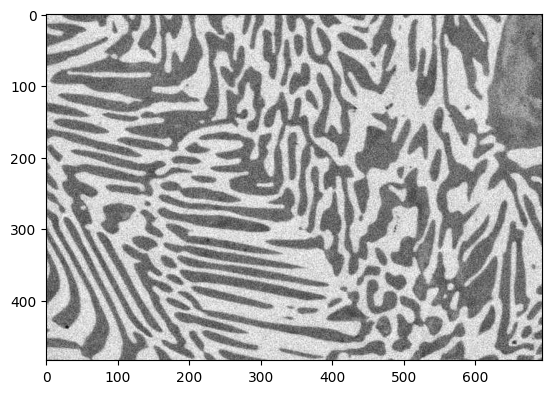

In [10]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)
plt.imshow(clahe_img, cmap="gray");

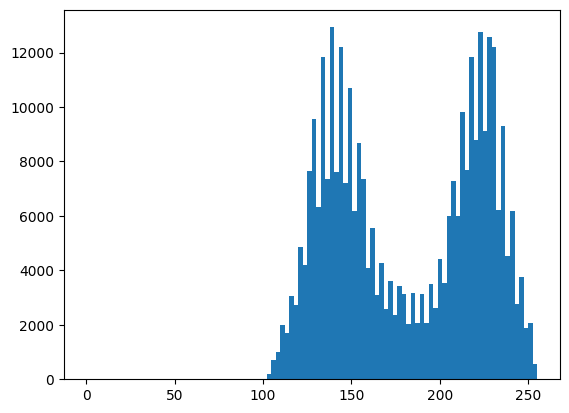

In [12]:
plt.hist(clahe_img.flat, bins=100, range=(0, 255));

## **5. Thresholding Techniques**
- Thresholding converts the image into binary or segmented regions by setting pixel values based on intensity. Various thresholding methods are used for specific purposes.

### **5.1 Simple Binary Thresholding**
- This binary thresholding operation sets pixels with intensities above 190 to 150 and those below to 0, which helps isolate brighter regions. Binary thresholding is useful for images where the background and object intensities are distinct.

**Parameters**:
- `threshold=190`: The intensity cutoff value.
- `maxVal=150`: The value assigned to pixels above the threshold.
- `cv2.THRESH_BINARY`: Performs standard binary thresholding.

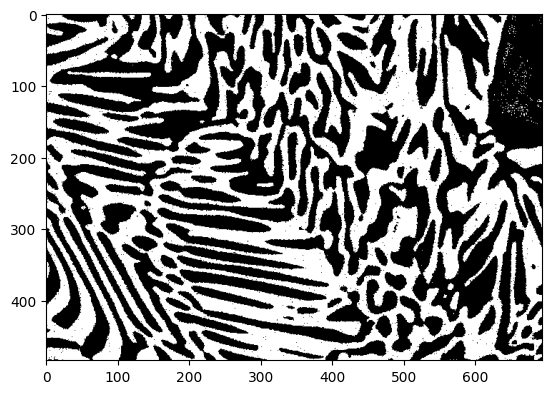

In [28]:
_, thresh1 = cv2.threshold(clahe_img, 190, 150, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray");

### **5.2 Inverse Binary Thresholding**
- In this inverse binary threshold, pixels above 190 are set to 0, and those below are set to 255. This technique is beneficial when the objects of interest have lower intensity than the background.

**Parameters**:
- `threshold=190`: Similar threshold to binary.
- `maxVal=255`: Pixels below the threshold are set to 255.
- `cv2.THRESH_BINARY_INV`: Performs inverse binary thresholding.

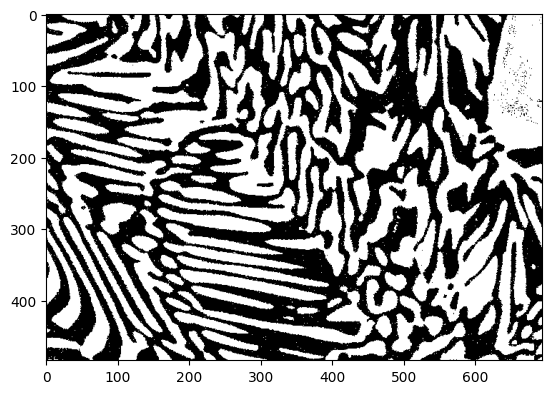

In [25]:
_, thresh2 = cv2.threshold(clahe_img, 190, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh2, cmap="gray");

### **5.3 Adaptive Thresholding with Otsu’s Method**
- Otsu’s method automatically determines an optimal threshold based on the histogram, typically effective for bimodal histograms where two distinct regions exist. It works well for images where the object and background intensities vary. In this code, 0 is passed as the initial threshold, and Otsu’s algorithm calculates the optimal threshold for segmenting the image.

**Parameters**:
- `threshold=0`: The initial threshold, with Otsu’s method setting the final threshold.
- `maxVal=255`: Pixels above the calculated threshold are set to 255.
- `cv2.THRESH_BINARY + cv2.THRESH_OTSU`: Combines binary thresholding with Otsu’s method for automatic threshold determination.

OTSU threshold value: 181.0



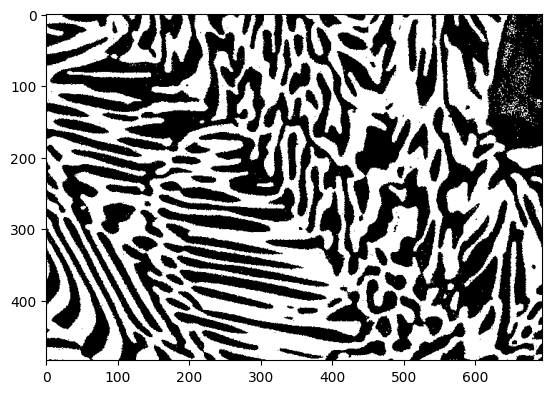

In [27]:
val, thresh3 = cv2.threshold(clahe_img, 190, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"OTSU threshold value: {val}\n")
plt.imshow(thresh3, cmap="gray");